In [122]:
import numpy as np
import pandas as pd

#A simple outlier


In [123]:
# Import the LocalOutlierFactor module
from sklearn.neighbors import LocalOutlierFactor as lof

# Create the list [1.0, 1.0, ..., 1.0, 10.0] as explained
x = [1.0]*30
x.append(10.0)

# Cast to a data frame
X = pd.DataFrame(x)

# Fit the local outlier factor and print the outlier scores
print(lof().fit_predict(X))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1]


The algorithm correctly identified the 10.0 as an outlier since it labeled it -1 which stands for anomalous. Let's move on.

Detecting Outliers in Time Series Data using Local Outlier Factor Algorithm

#Step:1 Import the Libraries



In [124]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

#Step:2 Read in the dataset



In [125]:
dataset = pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


#Step:3 Pre-processing

In [126]:
dataset = dataset.dropna(axis =0)
dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


#Step:4 Feature Selection



In [127]:
df = dataset[['month','day','PM2.5', 'PM10']]
df = df[:1200]
df

,month,day,PM2.5,PM10
0,3,1,4.0,4.0
1,3,1,8.0,8.0
2,3,1,7.0,7.0
3,3,1,6.0,6.0
4,3,1,3.0,3.0
...,...,...,...,...
1342,4,25,12.0,42.0
1343,4,25,29.0,104.0
1344,4,26,24.0,88.0
1345,4,26,41.0,146.0


In [128]:
df.dtypes

month      int64
day        int64
PM2.5    float64
PM10     float64
dtype: object

In [129]:
X = np.array(df['PM2.5']).reshape(-1,1)
Y = np.array(df['PM10']).reshape(-1,1)
month = np.array(df['month'])
day = np.array(df['day'])

#Step:5 Model Creation



In [130]:
model = LocalOutlierFactor(n_neighbors= 35 , contamination= 0.1)

#Step:6 Prediction



In [131]:
label = model.fit_predict(X,Y)
label

array([-1,  1, -1, ...,  1,  1,  1])

In [132]:
index = []
for i in range(len(label)):
  if label[i]!=1:
    index.append(i)
print("Outliers: ")
for i in index:
  print("Month",month[i]," Day", day[i])

Outliers: 
Month 3  Day 1
Month 3  Day 1
Month 3  Day 1
Month 3  Day 1
Month 3  Day 1
Month 3  Day 1
Month 3  Day 1
Month 3  Day 1
Month 3  Day 2
Month 3  Day 2
Month 3  Day 2
Month 3  Day 6
Month 3  Day 6
Month 3  Day 6
Month 3  Day 7
Month 3  Day 7
Month 3  Day 7
Month 3  Day 7
Month 3  Day 7
Month 3  Day 7
Month 3  Day 7
Month 3  Day 8
Month 3  Day 8
Month 3  Day 8
Month 3  Day 8
Month 3  Day 8
Month 3  Day 8
Month 3  Day 9
Month 3  Day 9
Month 3  Day 10
Month 3  Day 10
Month 3  Day 10
Month 3  Day 11
Month 3  Day 12
Month 3  Day 12
Month 3  Day 12
Month 3  Day 13
Month 3  Day 13
Month 3  Day 14
Month 3  Day 14
Month 3  Day 15
Month 3  Day 15
Month 3  Day 15
Month 3  Day 15
Month 3  Day 16
Month 3  Day 16
Month 3  Day 16
Month 3  Day 16
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 17
Month 3  Day 18
Month 3  Day 18
Month 3  Day 18
Month 3  D

#InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [133]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [134]:
## Perform all the steps of IQR
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [135]:
quantile1, quantile3= np.percentile(dataset,[25,75])

In [136]:
print(quantile1,quantile3)


12.0 15.0


In [137]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

3.0


In [138]:

## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value)

In [139]:
print(lower_bound_val,upper_bound_val)


7.5 19.5


Values greater than 19.5 and lower than 7.5 are outliers

Which Machine LEarning Models Are Sensitive To Outliers?

Naivye Bayes Classifier--- Not Sensitive To Outliers

SVM-------- Not Sensitive To Outliers

Linear Regression---------- Sensitive To Outliers

Logistic Regression------- Sensitive To Outliers

Decision Tree Regressor or Classifier---- Not Sensitive

Ensemble(RF,XGboost,GB)------- Not Sensitive

KNN--------------------------- Not Sensitive

Kmeans------------------------ Sensitive

Hierarichal------------------- Sensitive

PCA-------------------------- Sensitive

Neural Networks-------------- Sensitive

Outliers Effect on Titanic Dataset

In [140]:
titanic = pd.read_csv('/content/titanic.csv')
titanic.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [141]:
titanic['Age'].isnull().sum()

86

In [142]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


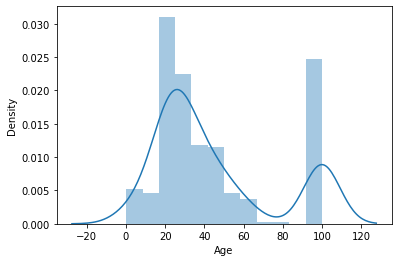

In [143]:
sns.distplot(titanic['Age'].fillna(100))

#Gaussian Distributed


Text(0, 0.5, 'No of passenger')

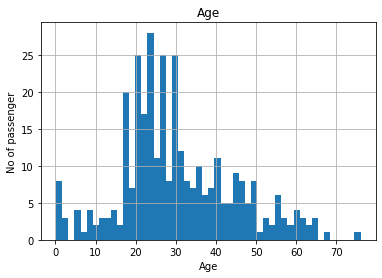

In [144]:
figure=titanic.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

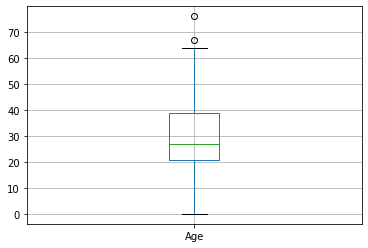

In [145]:
figure=titanic.boxplot(column="Age")

In [146]:
titanic['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

#If The Data Is Normally Distributed We use this

##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
Consider 3 Standard Deviation because most of the 99.5% of data will get accumulated in this Standard Normal Distribution






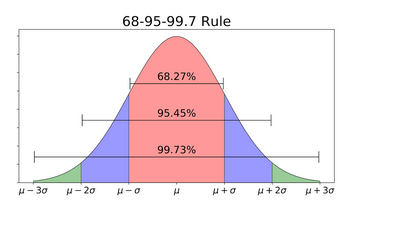

According to the Empirical Rule for Normal Distribution:

1.68.27% of data lies within 1 standard deviation of the mean

1.95.45% of data lies within 2 standard deviations of the mean

3.99.73% of data lies within 3 standard deviations of the mean



Thus, almost all the data lies within 3 standard deviations. This rule enables us to check for Outliers and is very helpful when determining the normality of any distribution.

In [147]:
uppper_boundary=titanic['Age'].mean() + 3* titanic['Age'].std()
lower_boundary=titanic['Age'].mean() - 3* titanic['Age'].std()
print(lower_boundary), print(uppper_boundary),print(titanic['Age'].mean())

-12.271037345427477
72.81621806831905
30.272590361445783


(None, None, None)

If data is Skewed

Text(0, 0.5, 'No of passenger')

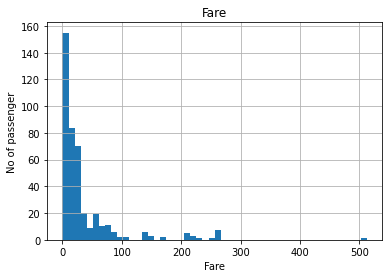

In [148]:
figure=titanic.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

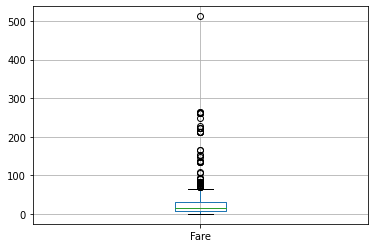

In [149]:
titanic.boxplot(column="Fare")

In [150]:
titanic['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [151]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=titanic.Fare.quantile(0.75)-titanic.Fare.quantile(0.25)

In [152]:
IQR

23.6042

In [153]:
lower_bridge=titanic['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=titanic['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-27.5105
66.9063


(None, None)

In [154]:
#### Extreme outliers
lower_bridge=titanic['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=titanic['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-62.9168
102.3126


(None, None)

In [155]:
data = titanic.copy()

In [157]:
data.loc[data['Age']>=73,'Age']=73

In [158]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

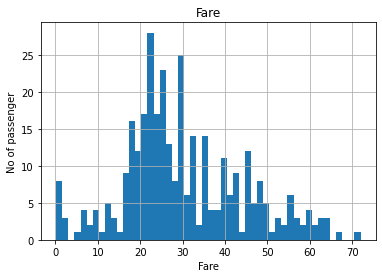

In [159]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

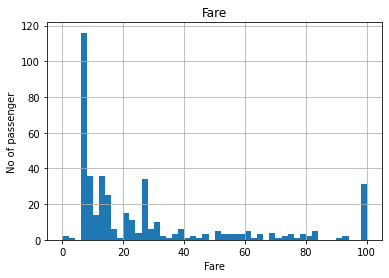

In [160]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')